# Importing dependencies:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
import joblib
from sklearn.pipeline import Pipeline

# Data Inspection:

In [11]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")


Checking the dtype for each column


In [12]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [13]:
print("training set info:")
df_train.info()

training set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   in

In [14]:
print("Summary of numerical features:")
print(df_train.describe())

Summary of numerical features:
       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  1995.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.310276   
std       439.418206     0.5001     0.816004     0.500035     4.335766   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  1995.000000  1995.000000  1995.000000  1996.000000  1996.000000  ...   
mean      0.521303    32.048120     0.502256   140.266533     4.518036  ...   
std       0.499671    18.146476     0.288530    35.384676     2.2

In [15]:
df_train.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,5
four_g,5
int_memory,5
m_dep,5
mobile_wt,4
n_cores,4


In [16]:
# Total number of missing values
df_train.isnull().sum().sum()

43

In [17]:
# Here I choose to fill each missing value with median because it's more rubust to the outliers

if df_train.isnull().sum().sum() > 0:
    df_train.fillna(df_train.median(), inplace=True)
else:
    print("We gooooood.")


In [18]:
df_train.isnull().sum().sum()

0

In [19]:
df_test.isnull().sum().sum()

0

Now we can say that we goooooooooood
<br>
In order to ensure data consistency we're gonna standarize the categorical columns as an integer values to remove any unintended floating-point values such as the four_g column

In [20]:
df_train['blue'] = df_train['blue'].astype(int)
df_train['dual_sim'] = df_train['dual_sim'].astype(int)
df_train['four_g'] = df_train['four_g'].astype(int)
df_train['three_g'] = df_train['three_g'].astype(int)
df_train['touch_screen'] = df_train['touch_screen'].astype(int)
df_train['wifi'] = df_train['wifi'].astype(int)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [21]:
df_test['blue'] = df_test['blue'].astype(int)
df_test['dual_sim'] = df_test['dual_sim'].astype(int)
df_test['four_g'] = df_test['four_g'].astype(int)
df_test['three_g'] = df_test['three_g'].astype(int)
df_test['touch_screen'] = df_test['touch_screen'].astype(int)
df_test['wifi'] = df_test['wifi'].astype(int)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

# Visualization

Let's see the correlation heatmap between the features

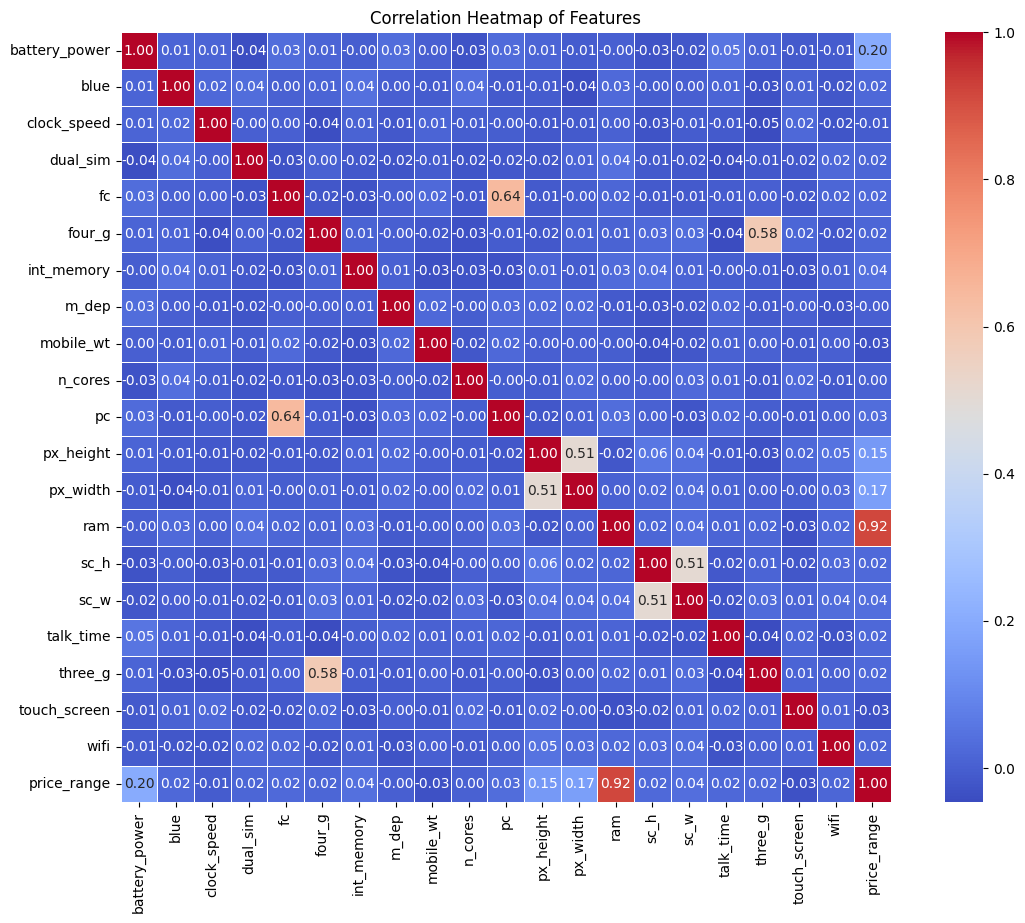

In [22]:
# Calculate the correlation matrix
correlation_matrix = df_train.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

From the heatmap above we can see that there is a strong correlation between the following features and the price:
<br>
RAM = 0.92
<br>
battery_power = 0.20
<br>
PX_width = 0.17
<br>
PX_height = 0.15
<br>
So we can say that these are the most important features to carry out the inference. Let's plot it.

<ipython-input-23-edb624a4e331>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='ram', data=df_train, palette='viridis')
<ipython-input-23-edb624a4e331>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='battery_power', data=df_train, palette='viridis')
<ipython-input-23-edb624a4e331>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='px_width', data=df_train, palette='viridis')
<ipython-input-23-edb624a4e331>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecate

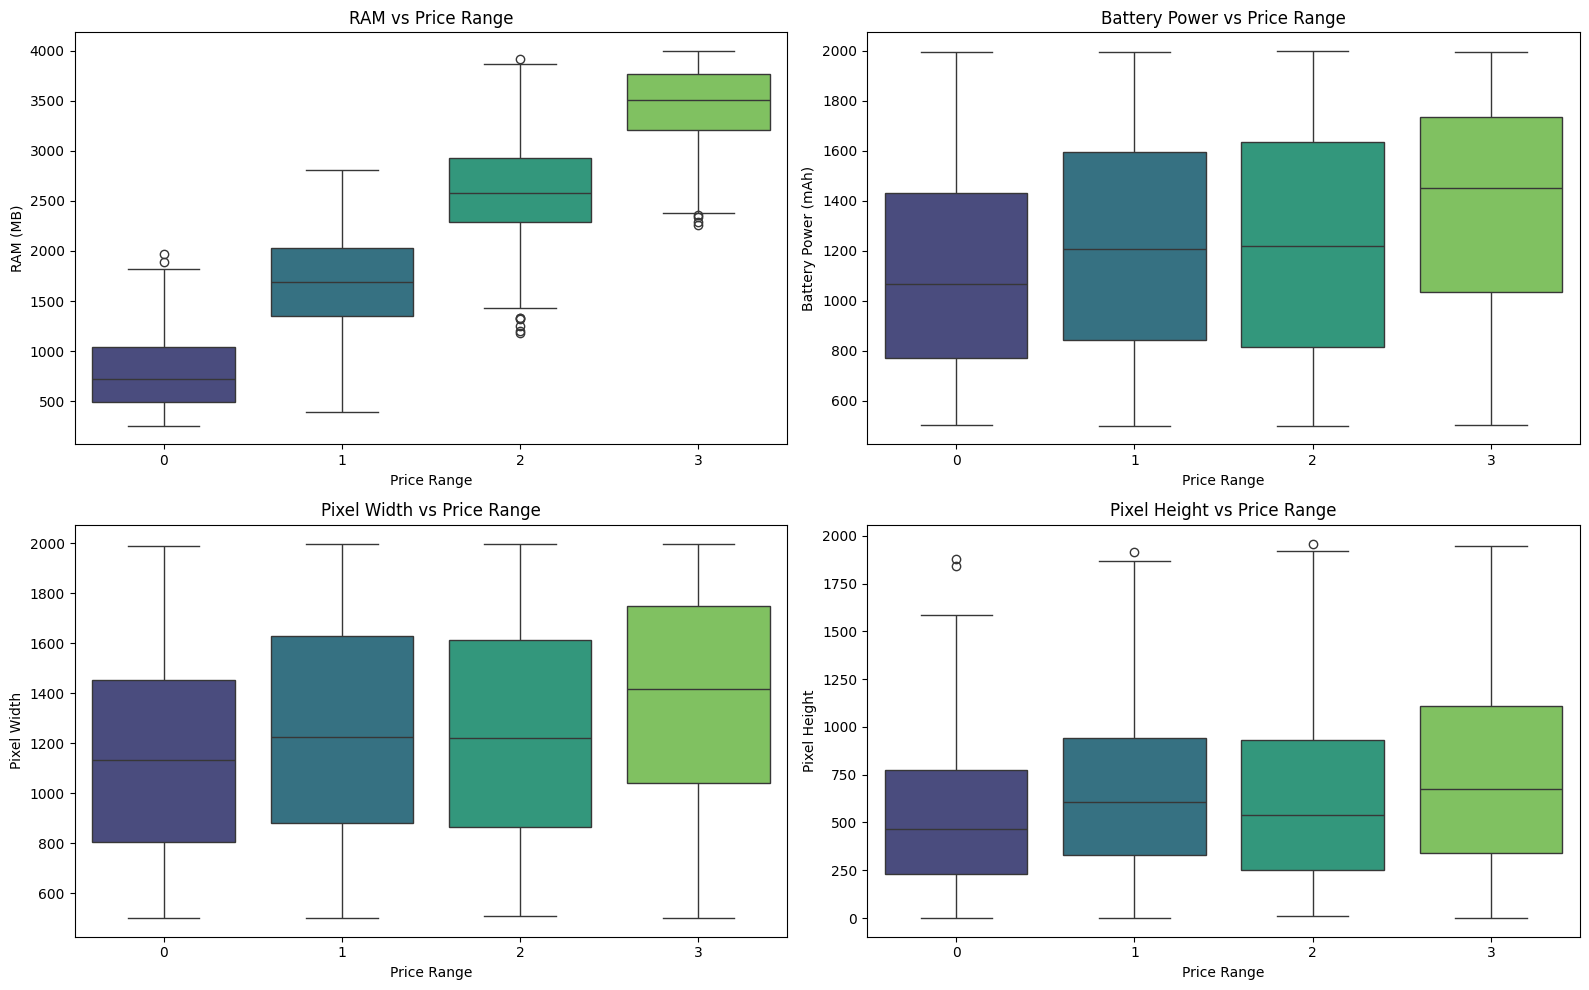

In [23]:
plt.figure(figsize=(16, 10))

# RAM vs Price Range
plt.subplot(2, 2, 1)
sns.boxplot(x='price_range', y='ram', data=df_train, palette='viridis')
plt.title("RAM vs Price Range")
plt.xlabel("Price Range")
plt.ylabel("RAM (MB)")

# Battery Power vs Price Range
plt.subplot(2, 2, 2)
sns.boxplot(x='price_range', y='battery_power', data=df_train, palette='viridis')
plt.title("Battery Power vs Price Range")
plt.xlabel("Price Range")
plt.ylabel("Battery Power (mAh)")

# Pixel Width vs Price Range
plt.subplot(2, 2, 3)
sns.boxplot(x='price_range', y='px_width', data=df_train, palette='viridis')
plt.title("Pixel Width vs Price Range")
plt.xlabel("Price Range")
plt.ylabel("Pixel Width")

# Pixel Height vs Price Range
plt.subplot(2, 2, 4)
sns.boxplot(x='price_range', y='px_height', data=df_train, palette='viridis')
plt.title("Pixel Height vs Price Range")
plt.xlabel("Price Range")
plt.ylabel("Pixel Height")

plt.tight_layout()
plt.show()

# Data Preparation:

For the input features `x_train` it gonna include all the features except the target feature `price_range` which gonna be the output feature `y_train`

In [24]:
x_train = df_train.drop(columns=['price_range'])
y_train = df_train['price_range']

In [25]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1.0,0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,0,0,1
1,1021,1,0.5,1,0.0,1,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0
2,563,1,0.5,1,2.0,1,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0
3,615,1,2.5,0,0.0,0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0
4,1821,1,1.2,0,13.0,1,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0


In [26]:
y_train.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [27]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [28]:
x_test = df_test.drop(columns=['id'])


Let's now scale our features.

In [29]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Modeling expermentation

## Random forest

Since we only have labels in the training set, we'll split it for validation.

In [30]:
x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [31]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [32]:
pipeline.fit(x_train1, y_train1)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])

Initializes a random forest model for classification and Specifies that the model will use 100 decision trees in the forest and train it

In [ ]:
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(x_train1_scaled, y_train1)

RandomForestClassifier(random_state=42)

In [33]:
y_val_pred = pipeline.predict(x_val)

### Evaluation

Let's start with the `Accuracy` to measure the general performance

In [34]:
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.8875


On the other hand the `Classification Report` measure the model's performance on each class using the common metrics `precision`, `Recall`, `F1-score`

In [35]:
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.87      0.86      0.86        91
           2       0.79      0.84      0.81        92
           3       0.93      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



Finally the `Confusion matrix` help us to understand where the model make a mistakes in the classification per class which is super important for our task as a multiclass classification task.

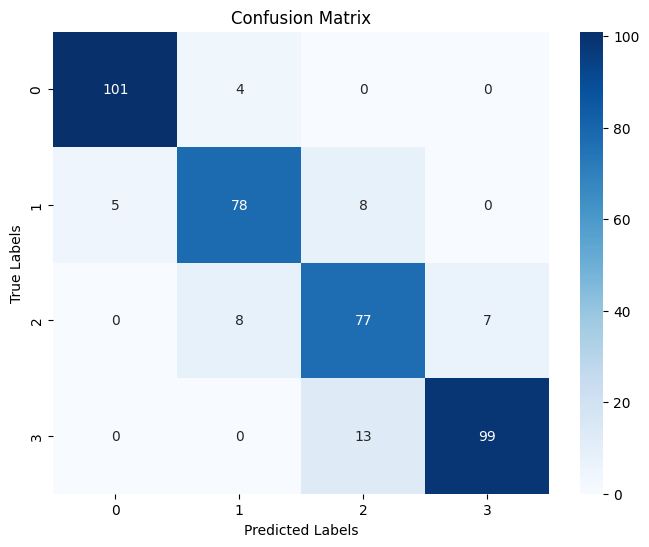

In [37]:
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Discussion:
<br>
The Accuracy Score = 0.8875, which is good but it's not enough to evaluate our model performance so on the classification report we found:
<br>
that the F1-score per class were acceptable and as the confusion matrix shows the model successfully manage to fit the data.

## Support Vector Machine

I wanna try different values of `C` and `gamma` using `RPF` kernal to find the optimal SVM model

In [38]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

Initilize the SVM model and the gridsearch

In [39]:
svm_model = SVC(random_state=42)
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [40]:
scaler = StandardScaler()
x_train1_scaled = scaler.fit_transform(x_train1)
x_val_scaled = scaler.transform(x_val)

In [41]:
grid_search.fit(x_train1_scaled, y_train1)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [42]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best Score: 0.9374999999999998


### Evaluation

In [43]:
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(x_val_scaled)

1- Accuracy Score:

In [44]:
accuracy_svm = accuracy_score(y_val, y_val_pred)
print(f"Accuracy Score: {accuracy_svm}")

Accuracy Score: 0.8875


2- Classification Report:

In [45]:
class_report_svm = classification_report(y_val, y_val_pred)
print(f"Classification Report:{class_report_svm}")

Classification Report:              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.87      0.86      0.86        91
           2       0.79      0.84      0.81        92
           3       0.93      0.88      0.91       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



3- Confusion matrix:

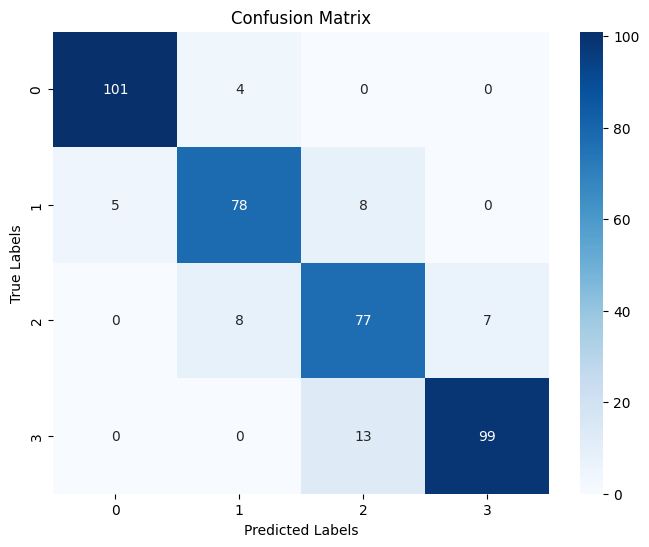

In [47]:
conf_matrix_svm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=best_svm_model.classes_, yticklabels=best_svm_model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Discussion:
<br>
We can say that the two previous models fit the data very good

# Saving the models:

We can save the Pipeline using `joblib.dump` method

In [49]:
joblib.dump(pipeline, "device_price_pipeline.joblib")

['device_price_pipeline.joblib']

And we can load it using `joblib.load` method

In [50]:
# random_forest_model = joblib.load('random_forest_model.joblib')